In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def read_file(file):
    df =  pd.read_csv(file)
    print(df.head())
    print(df.shape)
    return df

In [3]:
# Reading cleaned files
life_exp_df = read_file('../data/Milestone_1_cleaned_files/life_expectancy_clean.csv')
region_df =  read_file('../data/Milestone_1_cleaned_files/region_clean.csv')
income_df =  read_file('../data/Milestone_1_cleaned_files/income_clean.csv')
edu_df =  read_file('../data/Milestone_1_cleaned_files/edu_clean.csv')
crime_df =  read_file('../data/Milestone_1_cleaned_files/crime_clean.csv')
area_df =  read_file('../data/Milestone_1_cleaned_files/area_clean.csv')

            State  LifeExp2018  LifeExp2010  MaleLifeExp  FemLifeExp
0         Alabama         75.4         75.4         72.6        78.1
1          Alaska         78.8         78.0         76.7        81.2
2  American_Samoa         74.8         74.0         73.0        77.0
3         Arizona         79.9         79.3         77.5        82.3
4        Arkansas         75.9         76.0         73.1        78.6
(57, 5)
        State Abb Region            Division
0     Alabama  AL  South  East South Central
1      Alaska  AK   West             Pacific
2     Arizona  AZ   West            Mountain
3    Arkansas  AR  South  West South Central
4  California  CA   West             Pacific
(50, 4)
        State  Income2017  Income2016  Income2015  Income2014  Income2013  \
0     Alabama       48123       46257       44765       42830       42849   
1      Alaska       73181       76440       73355       71583       72237   
2     Arizona       56581       53558       51492       50068       4

In [4]:
from functools import reduce

In [5]:
# Merge all files on State column
merged_data = reduce(lambda x,y: pd.merge(x,y, on='State', how='inner'), [life_exp_df, region_df, income_df,edu_df,crime_df,area_df])

In [6]:
merged_data.head()

,State,LifeExp2018,LifeExp2010,MaleLifeExp,FemLifeExp,Abb,Region,Division,Income2017,Income2016,...,MurderRate,GunMurderRate,TotalSqMi,TotalKmQ,LandSqMi,LandKmQ,LandPer,WaterSqMi,WaterKmQ,WaterPer
0,Alabama,75.4,75.4,72.6,78.1,AL,South,East South Central,48123,46257,...,NaN,NaN,52420.07,135767,50645.33,131171,96.61,1774.74,4597,3.39
1,Alaska,78.8,78.0,76.7,81.2,AK,West,Pacific,73181,76440,...,7.7,5.3,665384.04,1723337,570640.95,1477953,85.76,94743.10,245384,14.24
2,Arizona,79.9,79.3,77.5,82.3,AZ,West,Mountain,56581,53558,...,4.1,2.5,113990.30,295234,113594.08,294207,99.65,396.22,1026,0.35
3,Arkansas,75.9,76.0,73.1,78.6,AR,South,West South Central,45869,45907,...,5.5,3.7,53178.55,137732,52035.48,134771,97.85,1143.07,2961,2.15
4,California,81.6,80.6,79.4,83.8,CA,West,Pacific,71805,67739,...,4.8,3.3,163694.74,423967,155779.22,403466,95.16,7915.52,20501,4.84


In [7]:
merged_data.columns

Index(['State', 'LifeExp2018', 'LifeExp2010', 'MaleLifeExp', 'FemLifeExp',
       'Abb', 'Region', 'Division', 'Income2017', 'Income2016', 'Income2015',
       'Income2014', 'Income2013', 'Income2012', 'Income2011', 'Income2010',
       'Income2009', 'Income2008', 'Income2007', 'HSGradPer', 'BADegPer',
       'AdvDegPer', 'PopTot', 'MurderNMTot', 'MurderTot', 'GunMurderTot',
       'GunOwnPer', 'MurderNMRate', 'MurderRate', 'GunMurderRate', 'TotalSqMi',
       'TotalKmQ', 'LandSqMi', 'LandKmQ', 'LandPer', 'WaterSqMi', 'WaterKmQ',
       'WaterPer'],
      dtype='object')

In [8]:
merged_data.shape

(50, 38)

In [9]:
# set the index as 'State'
merged_data.set_index('State')

,LifeExp2018,LifeExp2010,MaleLifeExp,FemLifeExp,Abb,Region,Division,Income2017,Income2016,Income2015,...,MurderRate,GunMurderRate,TotalSqMi,TotalKmQ,LandSqMi,LandKmQ,LandPer,WaterSqMi,WaterKmQ,WaterPer
State,,,,,,,,,,,,,,,,,,,,,
Alabama,75.4,75.4,72.6,78.1,AL,South,East South Central,48123,46257,44765,...,NaN,NaN,52420.07,135767,50645.33,131171,96.61,1774.74,4597,3.39
Alaska,78.8,78.0,76.7,81.2,AK,West,Pacific,73181,76440,73355,...,7.7,5.3,665384.04,1723337,570640.95,1477953,85.76,94743.10,245384,14.24
Arizona,79.9,79.3,77.5,82.3,AZ,West,Mountain,56581,53558,51492,...,4.1,2.5,113990.30,295234,113594.08,294207,99.65,396.22,1026,0.35
Arkansas,75.9,76.0,73.1,78.6,AR,South,West South Central,45869,45907,42798,...,5.5,3.7,53178.55,137732,52035.48,134771,97.85,1143.07,2961,2.15
California,81.6,80.6,79.4,83.8,CA,West,Pacific,71805,67739,64500,...,4.8,3.3,163694.74,423967,155779.22,403466,95.16,7915.52,20501,4.84
Colorado,80.5,80.1,78.5,82.5,CO,West,Mountain,69117,65685,63909,...,3.2,2.1,104093.67,269601,103641.89,268431,99.57,451.78,1170,0.43
Connecticut,80.9,80.7,78.7,83.0,CT,Northeast,New England,74168,73433,71346,...,3.0,2.0,5543.41,14357,4842.36,12542,87.35,701.06,1816,12.65
Delaware,78.4,78.3,76.2,80.6,DE,South,South Atlantic,62852,61757,61255,...,6.7,5.5,2488.72,6446,1948.54,5047,78.29,540.18,1399,21.71
Florida,80.0,79.0,77.3,82.6,FL,South,South Atlantic,52594,50860,49426,...,NaN,NaN,65757.70,170312,53624.76,138887,81.55,12132.94,31424,18.45


In [10]:
# Summary statistics for life expectancy(2018)
merged_data['LifeExp2018'].describe()

count    50.000000
mean     78.698000
std       1.799262
min      74.800000
25%      77.850000
50%      79.100000
75%      79.900000
max      82.300000
Name: LifeExp2018, dtype: float64

/home/pallabee/.virtualenvs/keras/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/pallabee/.virtualenvs/keras/lib/python3.6/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


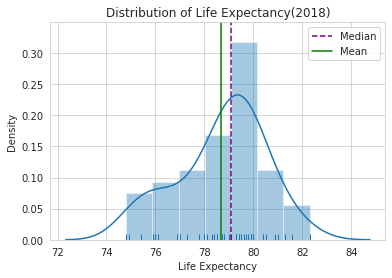

<Figure size 432x288 with 0 Axes>

In [11]:
# Plotting the distribution for life expectancy(2018)
sns.set_style('whitegrid')
sns.distplot(x = merged_data['LifeExp2018'],kde = True, rug = True)
plt.axvline(merged_data['LifeExp2018'].median(), color = 'purple', linestyle = '--',label = 'Median')
plt.axvline(merged_data['LifeExp2018'].mean(), color = 'green', label = 'Mean')
plt.xlabel('Life Expectancy')
plt.title('Distribution of Life Expectancy(2018)')
plt.legend()
plt.show()
plt.clf()

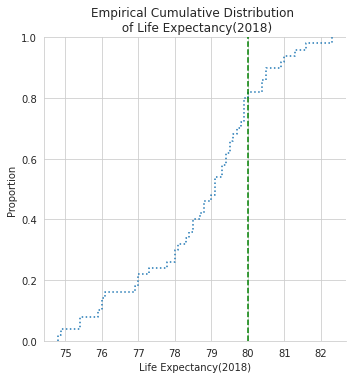

<Figure size 432x288 with 0 Axes>

In [12]:
# Plot of the life empirical cumulative distribution function (ECDF) of life expectancy(2018)
sns.displot(merged_data['LifeExp2018'],kind = 'ecdf', linestyle = ':')
plt.axvline(x = 80, color = 'green', linestyle = '--')
plt.xlabel('Life Expectancy(2018)')
plt.title('Empirical Cumulative Distribution \n of Life Expectancy(2018)')
plt.show()
plt.clf()